# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, on=["Mouse ID"], how='left')

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_data_complete["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data_complete[mouse_data_complete.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_complete[mouse_data_complete["Mouse ID"].isin(duplicate_mice)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = mouse_data_complete[~mouse_data_complete["Mouse ID"].isin(duplicate_mice)]
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tmp = df.groupby("Drug Regimen")['Tumor Volume (mm3)']
drug_summary = pd.DataFrame({"Mean Tumor Volume": tmp.mean(),
                             "Median Tumor Volume": tmp.median(),
                             "Tumor Volume Variance": tmp.var(),
                             "Tumor Volume Std. Dev.": tmp.std(),
                             "Tumor Volume Std. Err.": tmp.sem()})
drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']).style.set_caption('Tumor Volume (mm3)')


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

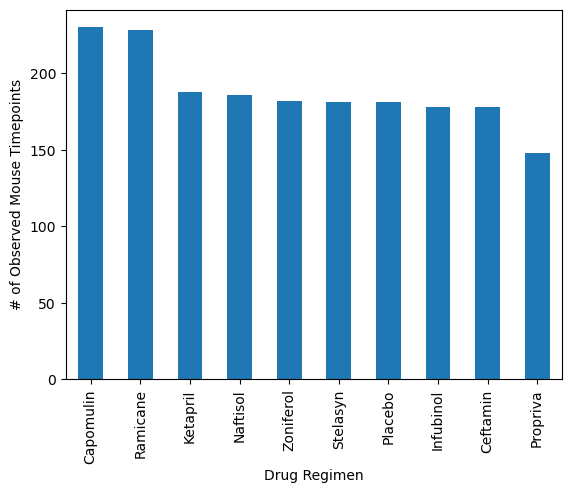

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_per_drug = df["Drug Regimen"].value_counts()
total_per_drug.plot.bar(x='Drug Regimen', y='Timepoint', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints');

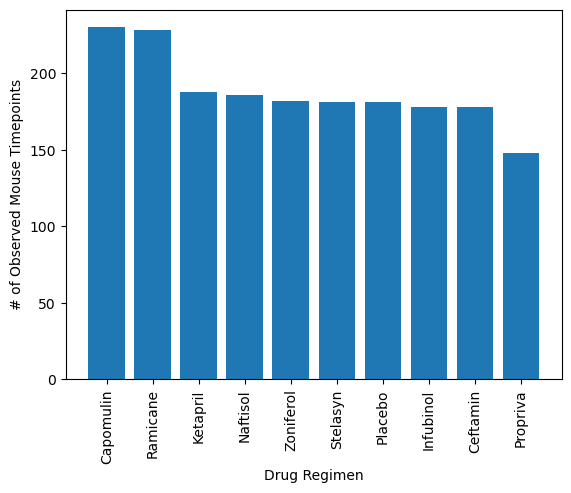

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# plt.figure(figsize=[16,4])
plt.bar(total_per_drug.index, total_per_drug.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical') 
plt.show()

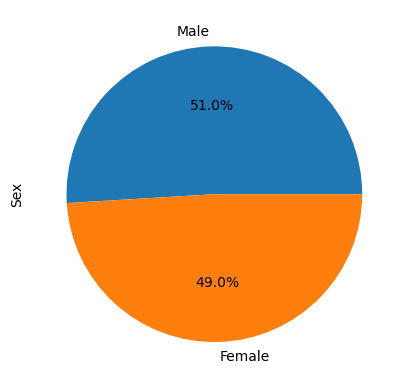

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
total_per_sex = df["Sex"].value_counts()
#total_per_sex.plot(kind='pie', autopct='%1.1f%%', explode = [0.05, 0], shadow=True)
total_per_sex.plot(kind='pie', autopct='%1.1f%%')
plt.show()

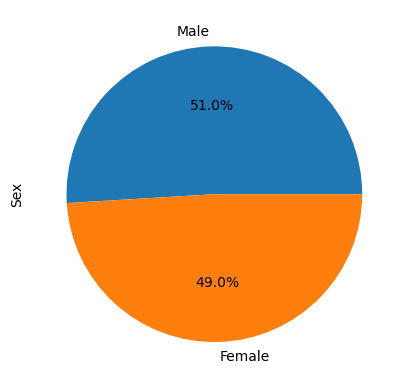

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.ylabel("Sex")
plt.pie(total_per_sex.values, labels=total_per_sex.index, autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor_size = df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged = pd.merge(max_tumor_size, df, on=['Mouse ID', 'Timepoint'])

In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments_of_interest:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    temp = merged.loc[merged['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    q1 = temp.quantile(0.25)
    q3 = temp.quantile(0.75)
    iqr = q3-q1
    # add subset
    tumor_vol.append(temp)
    # Determine outliers using upper and lower bounds
    high = q3 + iqr * 1.5
    low = q1 - iqr * 1.5
    print(f"{drug}'s potential outliers: {temp.loc[(temp < low) | (temp > high)].index} {temp.loc[(temp < low) | (temp > high)].values}")
    outliers.append(temp.loc[(temp < low) | (temp > high)].values)

Capomulin's potential outliers: Int64Index([], dtype='int64') []
Ramicane's potential outliers: Int64Index([], dtype='int64') []
Infubinol's potential outliers: Int64Index([31], dtype='int64') [36.3213458]
Ceftamin's potential outliers: Int64Index([], dtype='int64') []


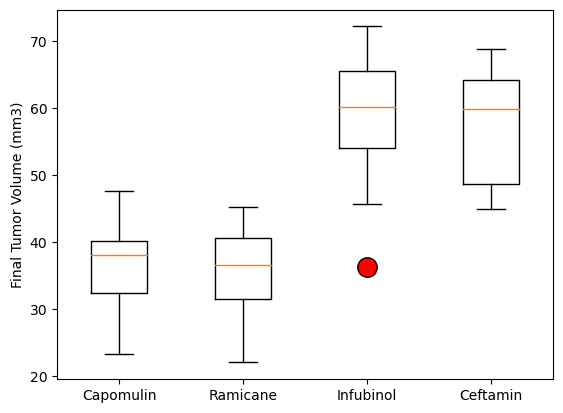

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels=treatments_of_interest, flierprops={'markerfacecolor': 'red', 'markersize': 14})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

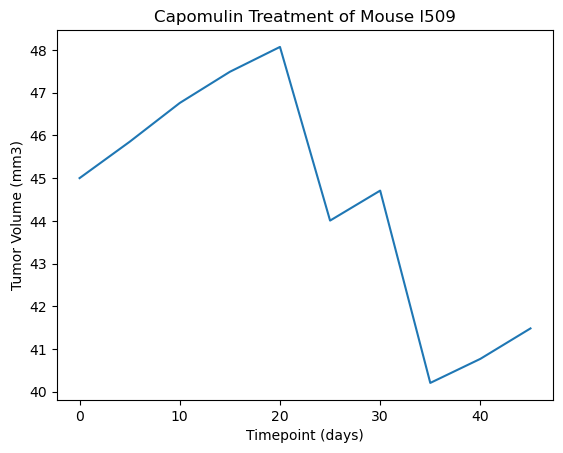

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = df[df['Mouse ID'] == 'l509']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title('Capomulin Treatment of Mouse l509');

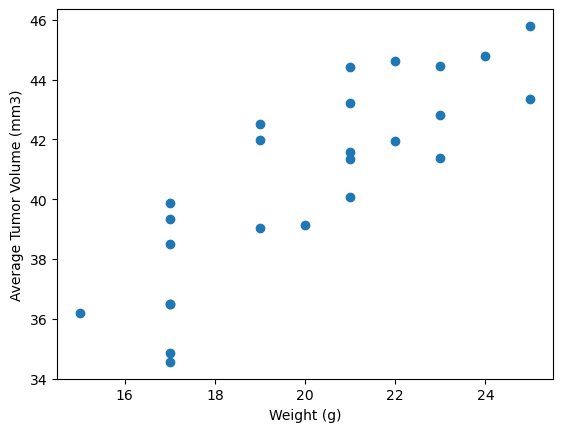

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = df[df['Drug Regimen'] == 'Capomulin']
mean_tumor_vol = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mean_weight = capomulin.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(mean_weight, mean_tumor_vol)
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)');

## Correlation and Regression

LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)


[]

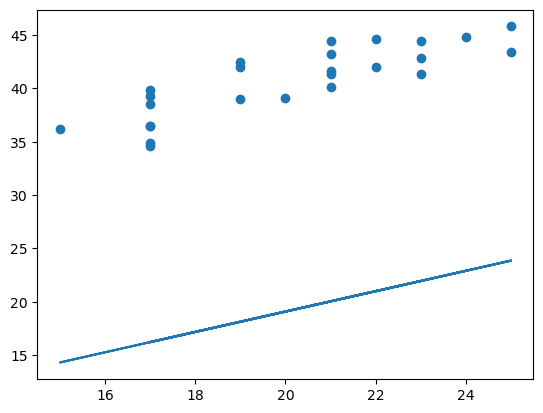

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
lin_reg = st.linregress(mean_weight, mean_tumor_vol)
print(lin_reg)
plt.scatter(mean_weight, mean_tumor_vol)
y = lin_reg[0] * mean_weight
plt.plot(mean_weight, y)
plt.plot()

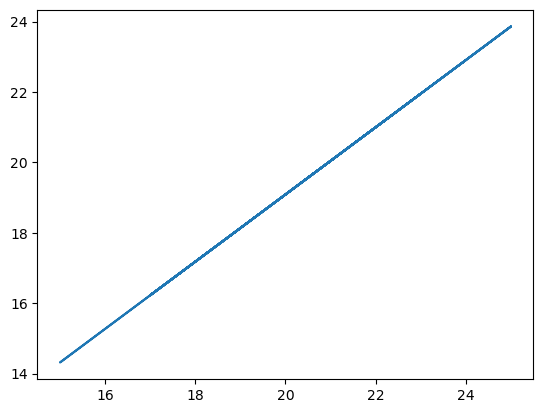

In [19]:
y = lin_reg[0] * mean_weight
plt.plot(mean_weight, y)